In [71]:
#!pip install yellowbrick

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

In [148]:
df = pd.read_csv("./data/final_data_per_minute.csv")
df.drop(columns = ["Unnamed: 0", "#"], inplace = True)

In [149]:
df['HEIGHT'] = df['HEIGHT'].str.replace('-','.')
df["HEIGHT"] = pd.to_numeric(df["HEIGHT"], downcast="float")

In [150]:
df.head()

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_attempted,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made
0,A.J. Slaughter,GCN,22,24.3,0.2,0.4,484.0,0.1,0.2,402.0,...,32.0,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0
1,Aaron Doornekamp,CAN,31,25.6,0.1,0.2,431.0,0.1,0.2,441.0,...,31.0,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0
2,Aaron Jones,BBB,8,19.7,0.1,0.2,419.0,0.0,0.1,375.0,...,4.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Achille Polonara,CAJ,31,26.7,0.2,0.3,478.0,0.1,0.2,352.0,...,39.0,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0
4,Adam Hanga,FCB,31,16.1,0.1,0.2,578.0,0.1,0.1,541.0,...,19.0,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0


In [151]:
df.drop(columns = ["FGM", "FGA", "FG%", "3PM", "3PA", "3P%", "FTM", "FTA", "FT%"], inplace = True)

In [154]:
df.columns

Index(['PLAYER_NAME', 'Team', 'GP', 'MIN', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'POS', 'HEIGHT', 'WEIGHT', 'AGE',
       'zona1_attempted', 'zona1_made', 'zona2_attempted', 'zona2_made',
       'zona3_attempted', 'zona3_made', 'zona4_attempted', 'zona4_made',
       'zona5_attempted', 'zona5_made', 'zona6_attempted', 'zona6_made',
       'zona7_attempted', 'zona7_made', 'zona8_attempted', 'zona8_made',
       'zona9_attempted', 'zona9_made', 'zona10_attempted', 'zona10_made',
       'zona11_attempted', 'zona11_made', 'zona12_attempted', 'zona12_made',
       '% ZONA1', '% ZONA2', '% ZONA3', '% ZONA4', '% ZONA5', '% ZONA6',
       '% ZONA7', '% ZONA8', '% ZONA9', '% ZONA10', '% ZONA11', '% ZONA12'],
      dtype='object')

In [153]:
for i in range(1, 13):
    df[f"% ZONA{i}"] = df[f"zona{i}_made"] / df[f"zona{i}_attempted"]

In [155]:
delete_list = []
for i in df.columns:
    if "zona" in i:
        delete_list.append(i)

In [156]:
df.drop(columns = delete_list, inplace = True)

In [130]:
shooters_list = []
for i in df.columns:
    if "zona" not in i:
        delete_list.append(i)
    elif "ZONA"  not in i:
        shooters_list.append(i)

In [132]:
shooters = df.drop(columns = shooters_list)

KeyError: "['zona1_attempted' 'zona1_made' 'zona2_attempted' 'zona2_made'\n 'zona3_attempted' 'zona3_made' 'zona4_attempted' 'zona4_made'\n 'zona5_attempted' 'zona5_made' 'zona6_attempted' 'zona6_made'\n 'zona7_attempted' 'zona7_made' 'zona8_attempted' 'zona8_made'\n 'zona9_attempted' 'zona9_made' 'zona10_attempted' 'zona10_made'\n 'zona11_attempted' 'zona11_made' 'zona12_attempted' 'zona12_made'] not found in axis"

In [ ]:
shooters = shooters[shooters["GP"] > 7]

In [102]:
shooters.fillna(0, inplace = True)

In [103]:
s = shooters.drop(columns = ["PLAYER_NAME", "Team", "GP", "POS", "WEIGHT"])

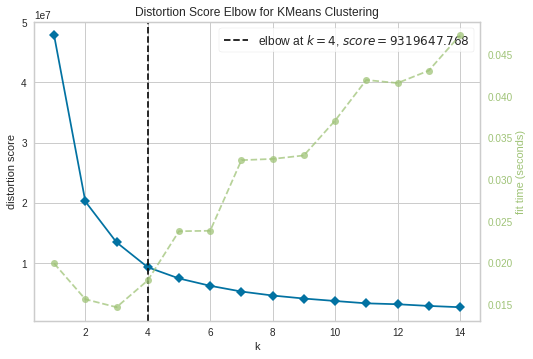

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(s)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [105]:
nClust = 4
km = KMeans(n_clusters=nClust, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km = km.fit_predict(s)



In [106]:
shooters['Cluster'] = y_km

In [107]:
shoot = shooters[["PLAYER_NAME", "Cluster"]]

In [113]:
cluster1 = shoot.loc[prueba["Cluster"] == 0]
cluster2 = shoot.loc[prueba["Cluster"] == 1]
cluster3 = shoot.loc[prueba["Cluster"] == 2]
cluster4 = shoot.loc[prueba["Cluster"] == 3]

print(cluster4)



          PLAYER_NAME  Cluster
6          Adams Sola        3
8       Albert Oliver        3
27          Alex Tyus        3
30       Alvaro Munoz        3
32      Andrew Albicy        3
..                ...      ...
348        Viny Okouo        3
352   Volodymyr Herun        3
360      Yankuba Sima        3
363   Youssoupha Fall        3
364  Youssoupha Ndoye        3

[66 rows x 2 columns]


In [157]:
df = df.loc[df["GP"] > 7]

In [158]:
df.fillna(0, inplace = True)

In [159]:
df

,PLAYER_NAME,Team,GP,MIN,TOV,PF,ORB,DRB,REB,AST,...,% ZONA3,% ZONA4,% ZONA5,% ZONA6,% ZONA7,% ZONA8,% ZONA9,% ZONA10,% ZONA11,% ZONA12
0,A.J. Slaughter,GCN,22,24.3,0.1,0.1,0.0,0.1,0.1,0.2,...,0.285714,0.333333,0.375000,0.583333,0.473684,0.406250,0.437500,0.625000,0.80,0.333333
1,Aaron Doornekamp,CAN,31,25.6,0.0,0.1,0.0,0.1,0.1,0.0,...,0.375000,0.250000,0.448276,0.555556,0.363636,0.419355,0.250000,0.640000,0.25,0.666667
2,Aaron Jones,BBB,8,19.7,0.1,0.1,0.1,0.1,0.2,0.1,...,0.000000,0.000000,0.000000,0.333333,0.555556,0.250000,0.000000,1.000000,0.00,0.000000
3,Achille Polonara,CAJ,31,26.7,0.0,0.1,0.1,0.1,0.2,0.1,...,0.500000,0.333333,0.400000,0.477273,0.600000,0.307692,0.428571,0.214286,0.60,0.500000
4,Adam Hanga,FCB,31,16.1,0.1,0.1,0.0,0.2,0.2,0.1,...,0.500000,0.666667,0.650000,0.571429,0.642857,0.473684,1.000000,0.500000,0.50,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Yannick Nzosa,UNI,23,12.5,0.0,0.2,0.1,0.2,0.2,0.0,...,0.000000,0.000000,0.000000,0.708333,0.533333,0.000000,0.000000,0.000000,0.00,0.000000
363,Youssoupha Fall,CAJ,27,12.2,0.1,0.1,0.1,0.2,0.3,0.0,...,0.000000,0.000000,0.000000,0.586957,0.553191,0.000000,0.000000,0.000000,0.00,0.000000
364,Youssoupha Ndoye,BETIS,34,21.0,0.1,0.1,0.1,0.1,0.2,0.0,...,0.000000,0.615385,0.000000,0.569444,0.500000,0.500000,0.285714,0.000000,0.00,0.000000
366,Ziga Samar,MON,31,9.8,0.1,0.2,0.0,0.1,0.1,0.2,...,0.000000,0.250000,0.250000,0.470588,0.640000,0.428571,0.571429,0.000000,0.00,0.000000


In [160]:
triples = [1,3,5,8,10,12]
mid_range = [2,4,9,11]
paint = [6,7]
for i in triples:
    df[f"% ZONA{i}"] = df[f"% ZONA{i}"] * 1.5
    
for m in mid_range:
    df[f"% ZONA{m}"] = df[f"% ZONA{m}"] * 1
    
for p in paint:
    df[f"% ZONA{p}"] = df[f"% ZONA{p}"] * 0.5


In [161]:
X = df.drop(columns = ["PLAYER_NAME", "Team", "GP", "POS", "WEIGHT", ])

In [203]:
X = X.drop(columns = ["AGE"])

In [8]:
correlation = df.corr()

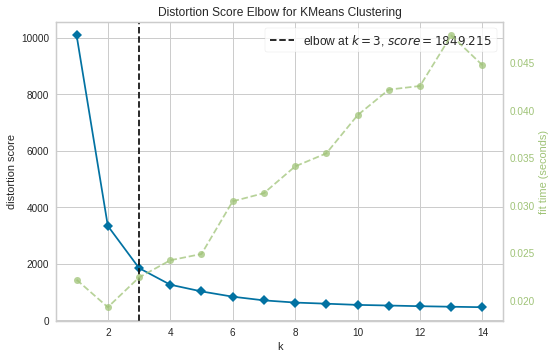

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [204]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [205]:
nClust = 12
km = KMeans(n_clusters=nClust, init='random', n_init=10, random_state=0)
y_km = km.fit_predict(X)



In [206]:
y_km

array([ 3,  7, 10,  7,  2, 10,  6,  2,  3, 10,  3,  3,  5,  4, 11,  2,  3,
        1,  6,  6,  5,  9,  2,  0,  6,  9,  3,  1,  5,  4,  5,  0,  2,  6,
        4,  5,  1, 10,  8,  1,  6,  6,  8,  2,  3,  0,  9,  6,  6,  9,  1,
        3,  3,  7, 10,  1,  7,  8,  3,  9,  0,  3, 10,  5,  2,  1, 10,  8,
       11, 10, 11,  8,  8,  5,  3,  3,  8,  4,  0,  8,  1,  4,  5,  9,  6,
        2,  3,  0,  8,  1, 10,  1, 10, 10,  1,  1, 10,  3,  8,  3,  0,  0,
        4,  1, 10,  1,  6,  9,  7,  3,  5,  5,  5,  6,  5,  5, 10, 10,  5,
        7,  3, 10,  1,  3,  8,  6,  3,  6,  2,  7,  2,  3,  2,  8,  0, 11,
        5,  3,  1,  5,  3,  2,  5,  9,  6,  9,  4,  4,  5,  5,  6, 10,  7,
        5,  6,  1,  8,  5,  8, 10,  1,  2,  2,  7,  3,  3,  3,  5,  5,  6,
       10,  0,  0, 10,  7,  6,  8,  9,  3,  3, 11,  2,  1, 10,  6,  4,  2,
        9,  2,  8,  1,  1,  1,  7, 10,  9,  7,  1,  3,  1,  3,  9,  9,  0,
        0,  5,  7,  5, 10,  3,  3,  7,  2,  2,  3,  8,  6,  2,  4,  1, 10,
        4,  1,  5, 11,  2

In [195]:
df['Cluster'] = y_km

In [196]:
prueba = df[["PLAYER_NAME", "Cluster"]]

In [201]:
cluster1 = prueba.loc[prueba["Cluster"] == 1]
list(cluster1.PLAYER_NAME)

['Alec Brown',
 'Alex Abrines',
 'Andrew Albicy',
 'Augusto Lima',
 'Bandja Sy',
 'Bojan Dubljevic',
 'Bruno Fitipaldo',
 'Chris Czerapowicz',
 'Cory Higgins',
 'David Jelinek',
 'Dejan Kravic',
 'Edwin Jackson',
 'Facundo Campazzo',
 'Haukur Palsson',
 'Jake Cohen',
 'Jan Span',
 'Jaroslaw Zyskowski',
 'John Shurna',
 'Johnny Dee',
 'Ken Horton',
 'Klemen Prepelic',
 'Louis Labeyrie',
 'Nemanja Radovic',
 'Nicolas Laprovittola',
 'Nikola Kalinic',
 'Nikola Mirotic',
 'Robin Benzing',
 'Sadiel Rojas',
 'Sasu Salin',
 'Scott Eatherton',
 'Sean Kilpatrick',
 'Siim-Sander Vene',
 'Stan Okoye',
 'Tim Abromaitis',
 'Tomas Dimsa',
 'Trey Thompkins',
 'B. Olumuyiwa',
 'Yakuba Ouattara',
 'Youssoupha Ndoye']

In [198]:
cluster0 = prueba.loc[prueba["Cluster"] == 0]
list(cluster0.PLAYER_NAME)

['Alec Peters',
 'Angel Delgado',
 'Arnoldas Kulboka',
 'Frankie Ferrari',
 'Frankie Ferrari',
 'Frankie Ferrari',
 'Frankie Ferrari',
 'Gabriel Deck',
 'Jaime Echenique',
 'Jaime Fernandez',
 'Jaime Fernandez',
 'Jake Wiley',
 'Jake Wiley',
 'Jeremy Senglin',
 'Jonathan Barreiro',
 'Jordan Davis',
 'Jovan Novak',
 'Juan Vaulet',
 'Kyle Alexander',
 'Laurynas Birutis',
 'Luca Vildoza',
 'Ludde Hakanson',
 'Makai Mason',
 'Mike Daum',
 'Nenad Dimitrijevic',
 'Nenad Dimitrijevic',
 'Oriol Pauli',
 'Tyler Cavanaugh',
 'Xabier Lopez-Arostegui']

In [199]:
cluster2 = prueba.loc[prueba["Cluster"] == 2]
list(cluster2.PLAYER_NAME)

['Adams Sola',
 'Aleix Font',
 'Arnau Parrado',
 'Arturs Kurucs',
 'Arturs Zagars',
 'Boris Tisma',
 'Boris Tisma',
 'Emil Stoilov',
 'Ibrahim Magassa',
 'Jaime Pradilla',
 'Javi Garcia',
 'Josep Puerto',
 'Jovan Kljajic',
 'Jovan Kljajic',
 'Khalifa Diop',
 'Rafael Garcia',
 'Sander Raieste',
 'Tristan Vukcevic',
 'Ziga Samar']

In [200]:
cluster3 = prueba.loc[prueba["Cluster"] == 3]
list(cluster3.PLAYER_NAME)

['Alex Reyes',
 'Daniel Diez',
 'Emir Sulejmanovic',
 'Felipe Dos Anjos',
 'Ilimane Diop',
 'Jordan Sakho',
 'Josh Sharma',
 'Maksim Salash',
 'Marques Townes',
 'Martynas Sajus',
 'Moses Kingsley',
 'Nick Spires',
 'Obi Enechionyia',
 'Santiago Yusta',
 'Shawn Dawson',
 'Shevon Thompson',
 'Volodymyr Herun',
 'Yankuba Sima',
 'Youssoupha Fall']

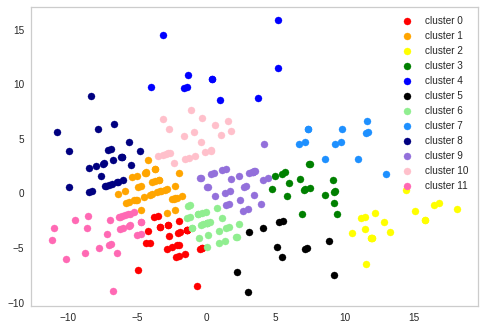

In [193]:

# Visualization
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

colormaps = ["red", "orange", "yellow", "green", "blue", "black", 'lightgreen','dodgerblue','navy','mediumpurple','pink','hotpink','oldlace','aqua','slategrey','palegreen','m','indianred','orchid']

for iCluster in range(0, nClust):
    plt.scatter(principalComponents[y_km == iCluster, 0], principalComponents[y_km == iCluster, 1], s=50, c=colormaps[iCluster],  label='cluster '+ str(iCluster))
plt.legend(scatterpoints=1,loc='best')
plt.grid()
plt.show()

In [49]:
len(y_km)

342